In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
import io, os, sys, types
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv("bike_demand_addloc_train.csv", parse_dates=["rent_time"])
train.shape

(11116440, 14)

In [3]:
train.head(3)

,Unnamed: 0,rent_place_num,rent_time,rent_freq,bef_1,bef_2,bef_3,bef_4,holder,subway_num,altitude,han_dist,park_dist,park_area
0,0,101,2017-06-01 00:00:00,2.0,2.0,2.0,1.0,2.0,5,2,6.011298,0.810084,0.559705,-0.464485
1,1,101,2017-06-01 01:00:00,0.0,2.0,2.0,2.0,1.0,5,2,6.011298,0.810084,0.559705,-0.464485
2,2,101,2017-06-01 02:00:00,0.0,0.0,2.0,2.0,2.0,5,2,6.011298,0.810084,0.559705,-0.464485


In [4]:
test = pd.read_csv("bike_demand_addloc_test.csv", parse_dates=["rent_time"])
test.shape

(914400, 14)

In [5]:
test.head(3)

,Unnamed: 0,rent_place_num,rent_time,rent_freq,bef_1,bef_2,bef_3,bef_4,holder,subway_num,altitude,han_dist,park_dist,park_area
0,0,101,2018-06-01 00:00:00,1.0,2.0,7.0,3.0,1.0,5,2,6.011298,0.810084,0.559705,-0.464485
1,1,101,2018-06-01 01:00:00,3.0,1.0,2.0,7.0,3.0,5,2,6.011298,0.810084,0.559705,-0.464485
2,2,101,2018-06-01 02:00:00,2.0,3.0,1.0,2.0,7.0,5,2,6.011298,0.810084,0.559705,-0.464485


In [ ]:
train.info()

In [ ]:
test.info()

In [6]:
## 불필요 columns drop
def drop_columns(feature,x):
    x.drop(feature, axis = 1, inplace=True)

In [7]:
drop_columns(["rent_time", "Unnamed: 0","rent_place_num"],train)
drop_columns(["rent_time", "Unnamed: 0","rent_place_num"],test)

In [8]:
print(train.shape)
print(test.shape)

(11116440, 11)
(914400, 11)


In [9]:
## 하이퍼파라미터 튜닝
tf.set_random_seed(777)

In [10]:
learning_rate= 0.0008
total_epoch = 30
batch_size = 8760

In [11]:
n_input = 11 # Number of features 
n_step = 4  # Stride 
n_hidden = 16
n_class = 1

In [12]:
## Data scaler
def MinMaxScaler(data):
    # 데이터 모든숫자들을 최소 값만큼 뺀다.
    numerator = data - np.min(data, 0)
    # 최대값과 최소 값의 차이(A)를 구한다
    denominator = np.max(data, 0) - np.min(data, 0)
    # 너무 큰 값이 나오지 않도록 나눈다
    return numerator / (denominator + 1e-7)

In [13]:
#train = MinMaxScaler(train)
x_pd = train
y_pd = train.loc[:,["rent_freq"]]
#test = MinMaxScaler(test)
tx_pd = test
ty_pd = test.loc[:,["rent_freq"]]

In [14]:
X_train= x_pd.as_matrix()
y_train= y_pd.as_matrix().reshape([len(train),n_class])
X_test= tx_pd.as_matrix()
y_test= ty_pd.as_matrix().reshape([len(test),n_class])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [15]:
## Build train dataset
dataX = []
dataY = []
for i in range(0, len(y_pd)- n_step):
    _x = X_train[i: i + n_step]
    _y = y_train[i + n_step]
    if i is 0:
        print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

[[ 2.          2.          2.          1.          2.          5.
   2.          6.01129795  0.81008432  0.55970523 -0.4644851 ]
 [ 0.          2.          2.          2.          1.          5.
   2.          6.01129795  0.81008432  0.55970523 -0.4644851 ]
 [ 0.          0.          2.          2.          2.          5.
   2.          6.01129795  0.81008432  0.55970523 -0.4644851 ]
 [ 1.          0.          0.          2.          2.          5.
   2.          6.01129795  0.81008432  0.55970523 -0.4644851 ]] -> [0.]


In [16]:
## Build test data set 
dataXt = []
dataYt = []
for i in range(0, len(ty_pd)- n_step):
    _xt = X_test[i: i + n_step]
    _yt = y_test[i + n_step]
    if i is 0:
        print(_xt, "->", _yt)
    dataXt.append(_xt)
    dataYt.append(_yt)

[[ 1.          2.          7.          3.          1.          5.
   2.          6.01129795  0.81008432  0.55970523 -0.4644851 ]
 [ 3.          1.          2.          7.          3.          5.
   2.          6.01129795  0.81008432  0.55970523 -0.4644851 ]
 [ 2.          3.          1.          2.          7.          5.
   2.          6.01129795  0.81008432  0.55970523 -0.4644851 ]
 [ 1.          2.          3.          1.          2.          5.
   2.          6.01129795  0.81008432  0.55970523 -0.4644851 ]] -> [0.]


In [17]:
train_size= int(len(dataY) * 1.0)
test_size = int(len(dataYt)* 1.0)

trainX, testX =np.array(dataX[0:train_size]), np.array(dataXt[0:test_size])
trainY, testY =np.array(dataY[0:train_size]), np.array(dataYt[0:test_size])

In [18]:
X = tf.placeholder(tf.float32, [None,n_step,n_input])
print("X", X)
Y = tf.placeholder(tf.float32, [None,n_class])
print("Y", Y)

X Tensor("Placeholder:0", shape=(?, 4, 11), dtype=float32)
Y Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)


In [19]:
targets = tf.placeholder(tf.float32,[None,n_class])
predictions = tf.placeholder(tf.float32,[None,n_class])

In [20]:
## lstm cell 생성
def lstm_cell():
    # LSTM셀을 생성한다.
    # num_units: 각 Cell 출력 크기
    # forget_bias: The bias added to forget gates.
    # state_is_tuple: True ==> accepted and returned states are 2-tuples of the c_state and m_state.
    # state_is_tuple: False ==> they are concatenated along the column axis.
    # cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True, activation=tf.sigmoid)
    # cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
    cell = tf.contrib.rnn.BasicLSTMCell(num_units=n_hidden, forget_bias=0.8, state_is_tuple=True, activation=tf.tanh)
    return cell

In [21]:
## 1 cell layer 모델
multi_cells = tf.contrib.rnn.MultiRNNCell([lstm_cell() for _ in range(1)], state_is_tuple=True)

Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which supports all the feature this cell currently has. Please replace the existing code with tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell').


In [22]:
## lstm output
hypothesis, _states = tf.nn.dynamic_rnn(multi_cells, X, dtype=tf.float32)
print("hypothesis: ", hypothesis)

hypothesis:  Tensor("rnn/transpose_1:0", shape=(?, 4, 16), dtype=float32)


In [23]:
Y_pred = tf.contrib.layers.fully_connected(hypothesis[:, -1], n_class, activation_fn=None)

In [24]:
loss = tf.reduce_sum(tf.square(Y_pred - Y))
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [ ]:
#is_correct = tf.equal(Y_pred,Y, dtype=tf.float32)
#accuracy = tf.reduce_mean(tf.cast(is_correct))

In [25]:
rmse = tf.sqrt(tf.reduce_mean(tf.squared_difference(targets, predictions)))

In [26]:
def batch_generator(batch_size, n_step, n_input):
    """    Generator function for creating random batches of training-data.    """
    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape=(batch_size, n_step ,n_input)
        x_batch=np.zeros(shape=x_shape,dtype=np.float32)
        
        # Allocate a new array for the batch of output-signals.
        y_shape=(batch_size, n_class)
        y_batch=np.zeros(shape=y_shape, dtype=np.float32)
        #y_batch = y_batch.reshape(batch_size, batch_size, n_class)
        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx=np.random.randint(int(len(trainX)) - n_step)
            # Copy the sequences of data starting at this index.
            x_batch[i] = X_train[idx:idx + n_step]
            y_batch[i] = y_train[idx]
        yield(x_batch, y_batch)


In [27]:
generator=batch_generator(batch_size, n_step, n_input)

In [28]:
x_batch,y_batch=next(generator)

Epoch: 0002 Avg cost = 3354.68709
Epoch: 0003 Avg cost = 952.96181
Epoch: 0004 Avg cost = 523.03716
Epoch: 0005 Avg cost = 364.30290
Epoch: 0006 Avg cost = 317.39198
Epoch: 0007 Avg cost = 244.77460
Epoch: 0008 Avg cost = 222.56815
Epoch: 0009 Avg cost = 163.01105
Epoch: 0010 Avg cost = 143.30382
Epoch: 0011 Avg cost = 109.44711
Epoch: 0012 Avg cost = 91.86357
Epoch: 0013 Avg cost = 125.38700
Epoch: 0014 Avg cost = 112.92117
Epoch: 0015 Avg cost = 88.05644
Epoch: 0016 Avg cost = 93.72120
Epoch: 0017 Avg cost = 87.92325
Epoch: 0018 Avg cost = 102.83737
Epoch: 0019 Avg cost = 82.12041
Epoch: 0020 Avg cost = 65.47824
Epoch: 0021 Avg cost = 55.01481
Epoch: 0022 Avg cost = 71.62170
Epoch: 0023 Avg cost = 68.79578
Epoch: 0024 Avg cost = 60.55826
Epoch: 0025 Avg cost = 78.38951
Epoch: 0026 Avg cost = 68.98278
Epoch: 0027 Avg cost = 51.30022
Epoch: 0028 Avg cost = 55.72385
Epoch: 0029 Avg cost = 64.68218
Epoch: 0030 Avg cost = 44.12585
Epoch: 0031 Avg cost = 59.75766
rmse:  2.5771255


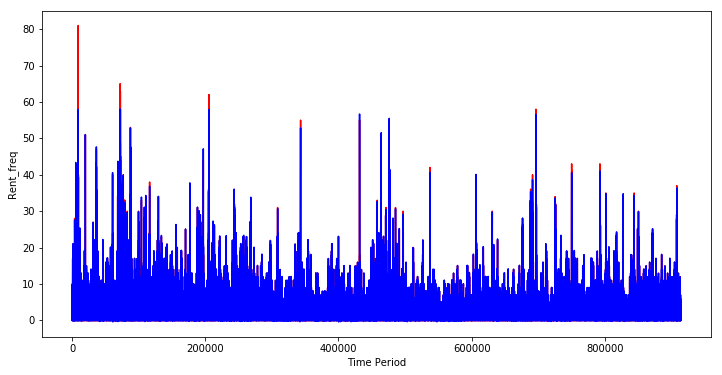

In [30]:
##모델 학습 및 테스트
period = int(X_train.shape[0]/batch_size)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for epoch in range(1,total_epoch+1):
            total_cost = 0
            generator=batch_generator(batch_size,n_step,n_input) ##<<2nd batch selecting method
            for i in range(period):
                batch_xs, batch_ys =next(generator)  ##<<2nd batch selecting method
                #batch_xs, batch_ys =next_batch(batch_size)
                
                _, cost_val = sess.run([train, loss], feed_dict={X: batch_xs, Y: batch_ys})
                total_cost += cost_val

            print('Epoch:', '%04d' % (epoch + 1),
                  'Avg cost =', '{:.5f}'.format(total_cost / period))
            
            
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    np.savetxt('test_predictLocH32S2_lstm.csv', test_predict, delimiter=',', fmt='%d')
    
    # 테스트용 데이터 기준으로 측정지표 rmse를 산출한다
    rmse_val = sess.run(rmse, feed_dict={targets: testY, predictions: test_predict})
    print("rmse: ", rmse_val)
    
    plt.figure(figsize=(12,6))
    plt.plot(testY, 'r')
    plt.plot(test_predict, 'b')
    plt.xlabel("Time Period")
    plt.ylabel("Rent_freq")
    plt.show()